# Task 4.9 - Intro to Data Visualization with Python

## Content of the script

### 3. provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

### 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

### 7. Explore whether there’s a connection between age and spending power (income) using scatterplot

### 8. Export your visualizations as “.png” files in your relevant project folder.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# This command tells python to remember a main folder path_Original Data
path_1= r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi/02. Data/Original Data'

In [3]:
# This command tells python to remember a main folder path_Prepared Data
path = r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi/02. Data/Prepared Data'

In [4]:
# Importing the new data file into the Jupyter 
cust_ord_prod = pd.read_pickle(os.path.join(path, 'orders_products_customer_merged.pkl'))

In [5]:
cust_ord_prod.shape

(32404859, 32)

## 3. provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

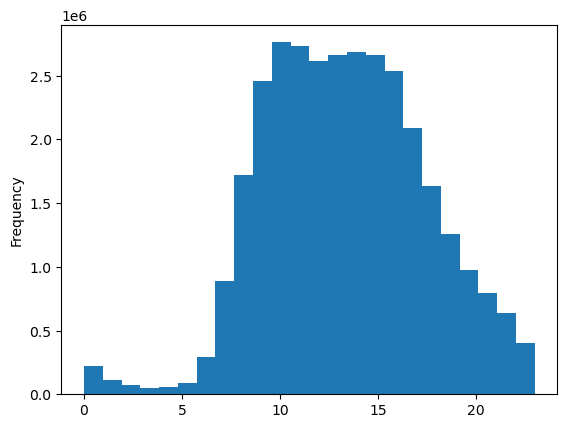

In [27]:
# creat histogram for 'order_hour_of_day'
hist = cust_ord_prod['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram reveals spikes at certain hours, likely corresponding to peak order times.  If these peaks occur around midday or early evening, it suggests customers prefer placing orders during lunch breaks or after work. The histogram's shape tells us how concentrated the ordering pattern is throughout the day.  A symmetrical, bell-shaped curve (normal distribution) indicates consistent ordering around a central time.  On the other hand, a skewed curve suggests a stronger preference for ordering during specific intervals, like afternoons or evenings.


## 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

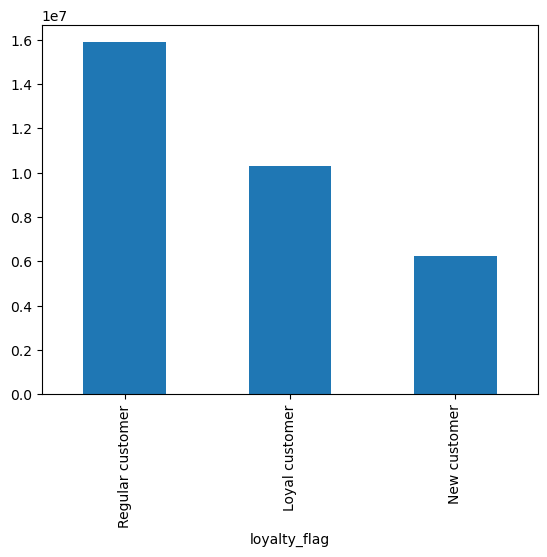

In [28]:
# create bar chart for 'loyalty_flag'
bar = cust_ord_prod['loyalty_flag'].value_counts().plot.bar()

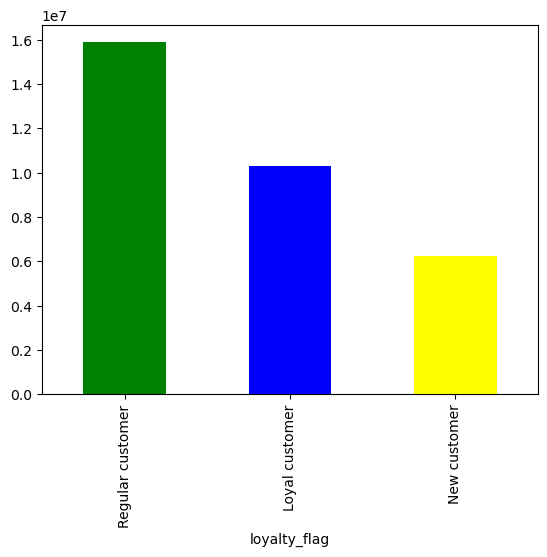

In [29]:
# create bar chart for 'loyalty_flag'
bar = cust_ord_prod['loyalty_flag'].value_counts().plot.bar(color = ['green', 'blue', 'yellow'])

## 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [30]:
# generating seed using random sample
np.random.seed(4)

In [31]:
# create dev list for (70/30)
dev = np.random.rand(len(cust_ord_prod)) <= 0.7

In [32]:
# Store 70% of the sample in the dataframe big
big = cust_ord_prod[dev]

In [33]:
# Store 30% of the sample in the dataframe small
small = cust_ord_prod[~dev]

In [34]:
len(cust_ord_prod)

32404859

In [35]:
len(big) + len(small)

32404859

In [36]:
cust_ord_prod_2 = small[['order_hour_of_day','prices']]

In [37]:
# check the subset sample
cust_ord_prod_2.head()

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


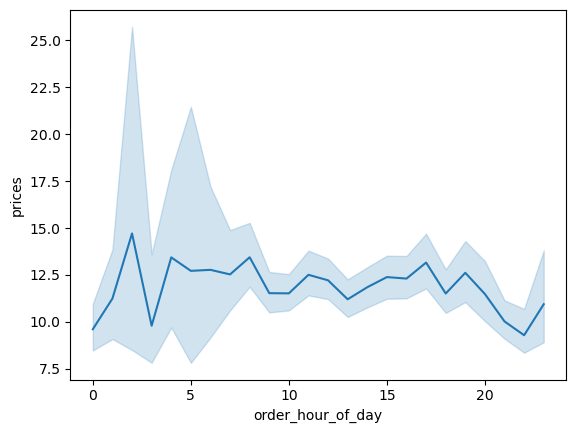

In [38]:
# Creating a line Chart
line = sns.lineplot(data = cust_ord_prod_2, x = 'order_hour_of_day',y = 'prices')

## 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [39]:
# check the connection between age
cust_ord_prod_3 = small [['age', 'n_dependants']]

In [40]:
# check the subset of the sample above
cust_ord_prod_3.head(6)

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1
12,19,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


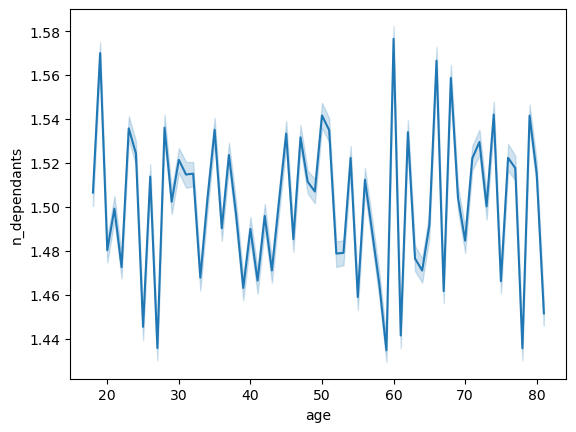

In [41]:
# create a line chart
line_1 = sns.lineplot(data = cust_ord_prod_3, x = 'age',y = 'n_dependants')

#### The data does not reveal any consistent patterns suggesting a strong relationship between age and the number of dependents. The line representing this relationship does not consistently trend upward or downward as age increases.

## 7.  Explore whether there’s a connection between age and spending power (income) using scatterplot. 

In [42]:
# check the connection between age and income
cust_ord_prod_4 = small [['age', 'income']]

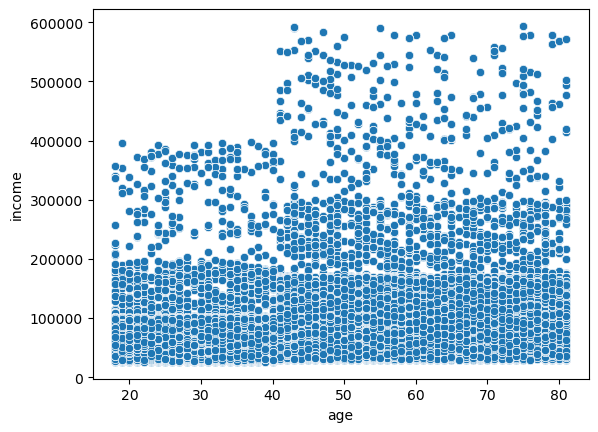

In [43]:
# create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = cust_ord_prod_4,)

#### Among the younger age groups, particularly those aged 20 to around 40, incomes vary widely, with a noticeable concentration at the lower end of the income scale. From around age 40 onwards, there is an upward trend in income, with many data points clustered in the higher income brackets. This pattern suggests that income tends to increase with age. The most densely populated points for individuals over 40 are significantly higher on the income scale compared to those under 40, indicating that median income likely rises with age. The scatterplot visually suggests trends, such as potential income increases with age, but statistical analysis is necessary to confirm any correlations or to fully understand the nuances of the relationship between age and income among the customers

## 8. Export your visualizations as “.png” files in your relevant project folder.

In [44]:
# This command defines the path where python saves the visualizations
path = r'/Users/obinwannealisigwe/Desktop/Python/Achievement_4_Project_Obi'

In [45]:
# Saving the Histogram in the path
hist.figure.savefig(os.path.join(path, 'Visualizations', 'hist_order_hour_of_day_freq.png'))

In [46]:
# Saving the bar chart in the path
bar.figure.savefig(os.path.join(path, 'Visualizations', 'loyalty_flag_distribution.png'))

In [47]:
# Saving the bar chart in the path
bar.figure.savefig(os.path.join(path, 'Visualizations', 'loyalty_flag_distribution_colour.png'))

In [48]:
# Saving the line chart in the path
line.figure.savefig(os.path.join(path, 'Visualizations', 'price_change_hours_day.png'))

In [49]:
# Saving the Histogram in the path
line_1.figure.savefig(os.path.join(path, 'Visualizations', 'age_dependant.png'))

In [50]:
# Saving the Histogram in the path
scatterplot.figure.savefig(os.path.join(path, 'Visualizations', 'change_spending_hour.png'))